In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/music200.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/music200.csv"
music_top200 = pd.read_csv(fname)

# tracks
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/track_features.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/track_features.csv"
track_features = pd.read_csv(fname)

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)



### Exercise 1:

Modify the code below so it calculates max popularity and average danceability **for each artist**.

In [2]:
artists = (track_features
  >> summarize(
      max_popularity = _.popularity.max(),
      avg_danceability = _.danceability.mean()
  )
)
artists

,max_popularity,avg_danceability
0,99,0.677941


Make a scatterplot of the data.

            artist  max_popularity  avg_danceability
0     #LikeMe Cast              44             0.413
1     #TocoParaVos              42             0.815
2             $NOT              43             0.847
...            ...             ...               ...
7189            黃宣              52             0.580
7190            黃莉               0             0.544
7191            黃齡              37             0.563

[7192 rows x 3 columns]


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


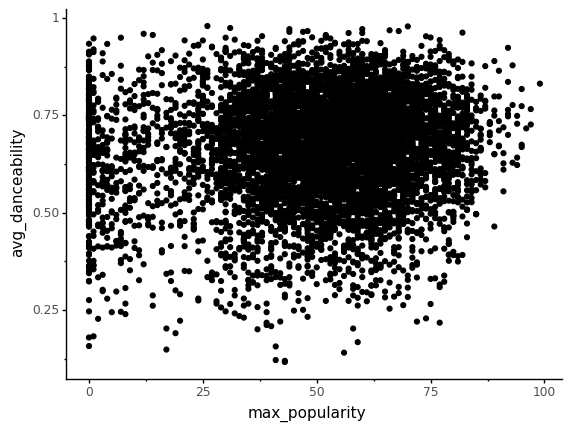

<ggplot: (296186474)>

In [3]:
artists = (track_features
  >> group_by(_.artist)
  >> summarize(
      max_popularity = _.popularity.max(),
      avg_danceability = _.danceability.mean()
  )
)

print(artists)

(artists
  >> ggplot(aes("max_popularity", "avg_danceability"))
   + geom_point()
)

In the plot above, what strange thing is going on with the distribution of max popularity?

<details>
<summary>possible answer</summary>

There are many artists with a max popularity of 0! 
  
</details>    

### Exercise 2:

In the last exercise of the facets chapter, you examined track features for three artists.

In [4]:
# This code keeps the 3 artists listed ----

artists_to_keep = ["Billie Eilish", "ITZY", "Roddy Ricch"]

some_artists = (
  track_features
  >> filter(_.artist.isin(artists_to_keep))
)

#uncomment line below to see data
#some_artists

We used a plot and intuition to judge who tended to have highest energy and valence tracks.

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


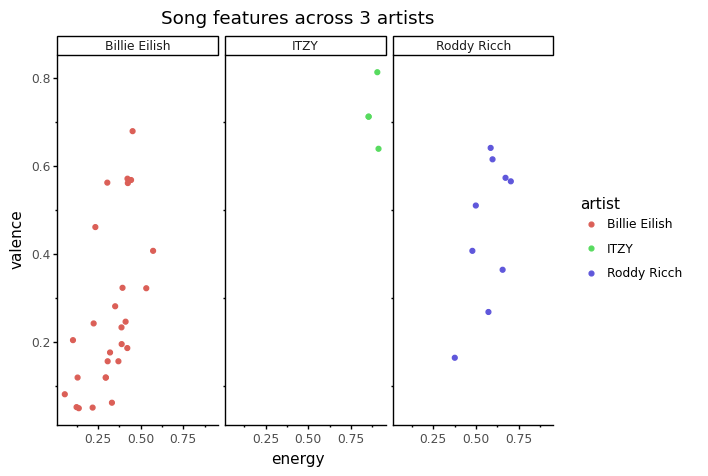

<ggplot: (296180684)>

In [5]:
# This code plots the data ----
(some_artists
  >> ggplot(aes("energy", "valence", color = "artist"))
   + geom_point()
   + facet_wrap("~artist", nrow = 1)
   + labs(title = "Song features across 3 artists")
)

Now you should be able to answer the question more directly!

**Use a grouped summarize to calculate the mean energy and valence for each artist**.

In [6]:
# summarizing mean energy and valence for each artist





In [7]:
# This code plots the data ----
(some_artists
  >> group_by(_.artist)
  >> summarize(avg_energy = _.energy.mean(), avg_valence = _.valence.mean())
)

,artist,avg_energy,avg_valence
0,Billie Eilish,0.321004,0.266948
1,ITZY,0.880250,0.720000
2,Roddy Ricch,0.571444,0.457333


Q: In this data, which artist has the lowest average energy, and what is its value?

<details><summary>answer</summary>Billie Eilish, 0.321004</details>

Q: What about for lowest average valence?

<details><summary>answer</summary>Billie Eilish, 0.266948</details>